In [249]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [250]:
# ALL INDICES READ INTO DF

from collections import OrderedDict
series = OrderedDict()
for filename in os.listdir("datasets/indices/"):
    
    path = "datasets/indices/" + filename
    cols = ['Date', 'Close', 'Volume']
    col1 = str(filename.lower().split(".")[0] + '_close')
    col2 = str(filename.lower().split(".")[0] + '_volume')
    
    try:
        series[filename] = pd.read_csv(path, parse_dates=True, header=0, index_col=0, usecols=cols)
        series[filename] = series[filename].rename(columns={'Date':'date','Close':col1,'Volume':col2})
    except:
        pass
    #    if filename == "S&P500-Energy.csv":
    #        series[filename] = pd.read_csv(path, parse_dates=True, header=0, index_col=0, usecols=['Date','Close'])
    #        series[filename] = series[filename].rename(columns={'Date':'date','Close':col1})

df_indices = pd.DataFrame()
for each in series.keys():
    df_indices = pd.concat([df_indices, series[each]], axis=1).dropna()
df_indices.head()

,S&P 500 Energy (Sector) (TR),s&p500-energy_close,s&p500_close,s&p500_volume


In [251]:
# ALL SENTIMENT DATA READ INTO DF

series = OrderedDict()
for filename in os.listdir("datasets/sentiment/"):
    
    path = "datasets/sentiment/" + filename
    cols = ['Date', 'Sentiment', 'News Volume', 'News Buzz']
    col1 = str(filename[4:].lower().split("_")[0] + '_sentiment')
    col2 = str(filename[4:].lower().split("_")[0] + '_newsvol')
    col3 = str(filename[4:].lower().split("_")[0] + '_buzz')
    
    try:
        series[filename] = pd.read_csv(path, parse_dates=True, header=0, index_col=0, usecols=cols)
        series[filename] = series[filename].rename(columns={'Date':'date','Sentiment':col1,'News Volume':col2, 'News Buzz':col3})
    except:
        pass

df_sentiment = pd.DataFrame()
for each in series.keys():
    df_sentiment = pd.concat([df_sentiment, series[each]], axis=1).dropna()
df_sentiment.head()

,abb_sentiment,abb_newsvol,abb_buzz,asys_sentiment,asys_newsvol,asys_buzz,ccgi_sentiment,ccgi_newsvol,ccgi_buzz,cenx_sentiment,...,cmi_buzz,fslr_sentiment,fslr_newsvol,fslr_buzz,ge_sentiment,ge_newsvol,ge_buzz,tsla_sentiment,tsla_newsvol,tsla_buzz
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,10.0,10.0,0.0,0.0,0.0
2013-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,10.0,-1.0,4.0,10.0,3.0,19.0,10.0,0.0,0.0,0.0
2013-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-5.0,...,2.0,5.0,2.0,5.0,2.0,9.0,4.0,0.0,0.0,0.0
2013-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,5.0,-1.0,3.0,7.0,3.0,7.0,3.0,0.0,0.0,0.0
2013-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0


In [252]:
# ALL STOCKS READ INTO DF

series = OrderedDict()
for filename in os.listdir("datasets/stock prices/"):
    
    path = "datasets/stock prices/" + filename
    cols = ['Date', 'Close', 'Volume']
    col1 = str(filename.lower().split(".")[0] + '_close')
    col2 = str(filename.lower().split(".")[0] + '_volume')
    
    try:
        series[filename] = pd.read_csv(path, parse_dates=True, header=0, index_col=0, usecols=cols)
        series[filename] = series[filename].rename(columns={'Date':'date','Close':col1,'Volume':col2})
    except:
        pass

df_stocks = pd.DataFrame()
for each in series.keys():
    df_stocks = pd.concat([df_stocks, series[each]], axis=1).dropna()
df_stocks.head()

,abb_close,abb_volume,asys_close,asys_volume,ccgi_close,ccgi_volume,cenx_close,cenx_volume,cmi_close,cmi_volume,fslr_close,fslr_volume,ge_close,ge_volume,pcrfy_close,pcrfy_volume,tsla_close,tsla_volume
Date,,,,,,,,,,,,,,,,,,
2010-06-29,17.490000,4731000.0,8.270000,47400.0,45.000000,0.0,9.070000,4079400.0,66.239998,4498100.0,114.419998,2243400.0,14.480000,114904900.0,12.470000,467600.0,23.889999,18766300.0
2010-06-30,17.280001,4224600.0,8.350000,12800.0,42.500000,0.0,8.830000,3519600.0,65.129997,3268500.0,113.830002,1937300.0,14.420000,81568200.0,12.530000,201000.0,23.830000,17187100.0
2010-07-01,17.590000,6328900.0,8.710000,70400.0,44.500000,0.0,8.680000,3968000.0,64.820000,5136200.0,117.449997,2078200.0,14.120000,107077700.0,12.430000,342500.0,21.959999,8218800.0
2010-07-02,17.430000,2315300.0,8.590000,41200.0,45.000000,0.0,8.600000,2444000.0,64.239998,3766900.0,120.519997,2082800.0,13.880000,78544600.0,12.450000,157800.0,19.200001,5139800.0
2010-07-06,17.690001,2955000.0,8.600000,30600.0,37.500000,0.0,8.610000,3302200.0,63.570000,3913900.0,121.879997,2506700.0,13.970000,77154700.0,12.810000,247400.0,16.110001,6866900.0


In [253]:
# FINAL MERGE

df = pd.concat([df_stocks, df_sentiment],axis=1).dropna()
df = pd.concat([df, df_indices],axis=1).dropna()


In [254]:
#DATAFRAME OF ONLY STOCK TICKS

series_ticks = OrderedDict()
for filename in os.listdir("datasets/stock prices/"):
    
    path = "datasets/stock prices/" + filename
    cols = ['Date', 'Close']
    col1 = str(filename.lower().split(".")[0] + '_close')    
    try:
        series_ticks[filename] = pd.read_csv(path, parse_dates=True, header=0, index_col=0, usecols=cols)
        series_ticks[filename] = series_ticks[filename].rename(columns={'Date':'date','Close':col1})
    except:
        pass

df_ticks = pd.DataFrame()
for each in series_ticks.keys():
    df_ticks = pd.concat([df_ticks, series_ticks[each]], axis=1).dropna()
df_ticks.head()

,abb_close,asys_close,ccgi_close,cenx_close,cmi_close,fslr_close,ge_close,pcrfy_close,tsla_close
Date,,,,,,,,,
2010-06-29,17.490000,8.270000,45.000000,9.070000,66.239998,114.419998,14.480000,12.470000,23.889999
2010-06-30,17.280001,8.350000,42.500000,8.830000,65.129997,113.830002,14.420000,12.530000,23.830000
2010-07-01,17.590000,8.710000,44.500000,8.680000,64.820000,117.449997,14.120000,12.430000,21.959999
2010-07-02,17.430000,8.590000,45.000000,8.600000,64.239998,120.519997,13.880000,12.450000,19.200001
2010-07-06,17.690001,8.600000,37.500000,8.610000,63.570000,121.879997,13.970000,12.810000,16.110001


In [255]:
#NON-STATIONARITY CHECK
import statsmodels.api as sm
import numpy as np

for col in df_ticks:
    d_order0=sm.tsa.stattools.adfuller(df_ticks[col].astype(float))
#     print('adf: ', d_order0[0])
#     print('p-value: ', d_order0[1])
#     print('Critical values: ', d_order0[4])

    if d_order0[0]> d_order0[4]['5%']: 
        print('Time Series ' + col +' is  nonstationary')
#         print(d)
    else:
        print('Time Series ' + col + 'is stationary')
#         print(d)



Time Series abb_close is  nonstationary
Time Series asys_close is  nonstationary
Time Series ccgi_closeis stationary
Time Series cenx_close is  nonstationary
Time Series cmi_close is  nonstationary
Time Series fslr_close is  nonstationary
Time Series ge_close is  nonstationary
Time Series pcrfy_close is  nonstationary
Time Series tsla_close is  nonstationary


In [256]:
df_ticks['abb_close'].plot()


TypeError: Empty 'DataFrame': no numeric data to plot

In [257]:
rolling_mean = pd.rolling_mean(df_ticks['tsla_close'],100)
detrend = df_ticks['tsla_close'] - rolling_mean
rolling_mean.plot()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
  """Entry point for launching an IPython kernel.


TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [ ]:
detrend.plot()

In [62]:
gm_returns = np.log(df_ticks['tsla_close']).diff()


2.6719957250652127

In [107]:
monthly = pd.Series([gm_returns[x:x+250].sum() for x in range(0,len(gm_returns),250)])

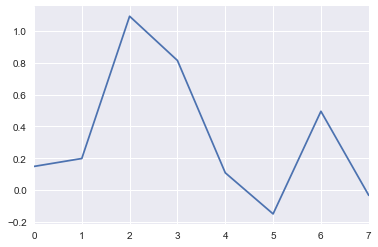

In [108]:
monthly.plot()

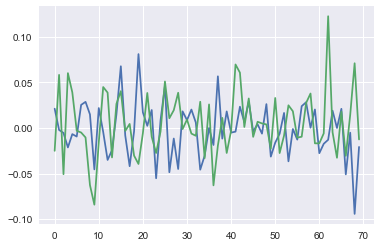

In [150]:
# plotting seasonal data by overlaying
months=[]
for x in range(0,len(df_ticks),70):
    temp = list(gm_returns[x:x+70])
    months.append(temp)
    
for series in months[3:5]:
    plt.plot([x for x in range(len(series))],series)

In [151]:
df_months = pd.DataFrame()
for x in range(0,len(df_ticks),70):
    df_months = df_months.append(gm_returns[x:x+70])


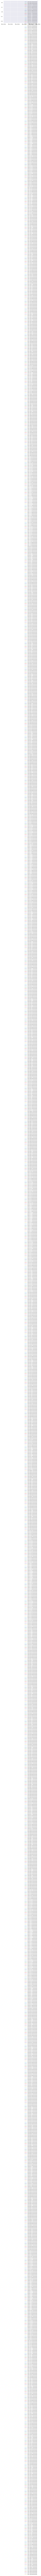

In [248]:
df_months.plot()

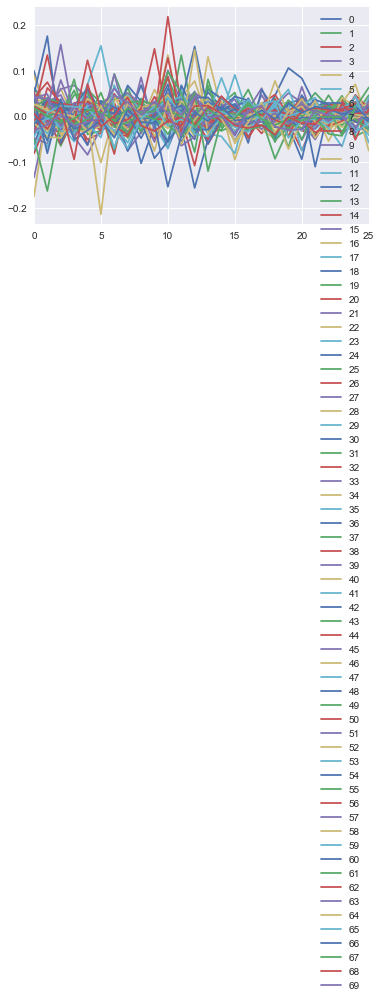

In [156]:
pd.DataFrame(months).plot()

In [242]:
#Machine Learning Approaches
#Using SVM Regression
#fitting the model and predicitng
from sklearn import svm

def ml_model(df, col_pred, model):
    X=df.loc[:, df.columns!=col_pred]
    Y=df[col_pred]
    split_point = int(0.75*len(df))
    x_train, x_test = X.iloc[:split_point],X.iloc[split_point:]
    y_train, y_test = Y.iloc[:split_point],Y.iloc[split_point:]

    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    evaluation_metrics(y_test, y_pred)
    return y_pred,y_test

In [243]:
#Evaluation metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

def evaluation_metrics(y_test, y_pred):
    err1 = explained_variance_score(y_test, y_pred)
    err2 = mean_squared_error(y_test, y_pred)
    err3 = mean_absolute_error(y_test, y_pred)
    print("Explained Variance Score", err1)
    print("Mean Squared Error", err2)
    print("Root Means Squared Error", sqrt(err2))

In [244]:
pred,test = ml_model(df_ticks,'abb_close', svm.SVR() )

Explained Variance Score 0.00394950528716
Mean Squared Error 5.69460416794
Root Means Squared Error 2.3863369770288534


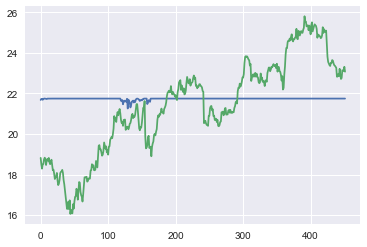

In [245]:
plt.plot(pred)
plt.plot(np.asarray(test))

In [241]:
len(y_test)

305

,abb_close,asys_close,ccgi_close,cenx_close,cmi_close,fslr_close,ge_close,pcrfy_close,tsla_close
Date,,,,,,,,,
2010-06-29,17.490000,8.27,45.000000,9.070000,66.239998,114.419998,14.480000,12.47,23.889999
2010-06-30,17.280001,8.35,42.500000,8.830000,65.129997,113.830002,14.420000,12.53,23.830000
2010-07-01,17.590000,8.71,44.500000,8.680000,64.820000,117.449997,14.120000,12.43,21.959999
2010-07-02,17.430000,8.59,45.000000,8.600000,64.239998,120.519997,13.880000,12.45,19.200001
2010-07-06,17.690001,8.60,37.500000,8.610000,63.570000,121.879997,13.970000,12.81,16.110001
2010-07-07,18.360001,8.67,35.500000,9.190000,67.410004,128.479996,14.620000,13.07,15.800000
2010-07-08,18.660000,8.65,39.000000,9.470000,68.940002,130.649994,14.830000,13.42,17.459999
2010-07-09,18.860001,8.69,45.000000,9.770000,71.529999,132.130005,14.950000,13.42,17.400000
2010-07-12,18.139999,8.59,43.000000,9.590000,70.660004,129.710007,14.930000,13.43,17.049999
